### Creating CNN Using Scratch And Transfer Learning

In [1]:
"""
Content
The dataset contains 2 folders

Infected
Uninfected
And a total of 27,558 images.
Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
And uploaded here, so anybody trying to start working with this dataset can get started immediately, as to download the
dataset from NIH website is quite slow.
Photo by Егор Камелев on Unsplash
https://unsplash.com/@ekamelev

Inspiration
Save humans by detecting and deploying Image Cells that contain Malaria or not!
"""

'\nContent\nThe dataset contains 2 folders\n\nInfected\nUninfected\nAnd a total of 27,558 images.\nAcknowledgements\nThis Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/\nAnd uploaded here, so anybody trying to start working with this dataset can get started immediately, as to download the\ndataset from NIH website is quite slow.\nPhoto by Егор Камелев on Unsplash\nhttps://unsplash.com/@ekamelev\n\nInspiration\nSave humans by detecting and deploying Image Cells that contain Malaria or not!\n'

In [17]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [18]:
import tensorflow as tf

In [19]:
print(tf.__version__)

2.5.0


In [28]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [29]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [30]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [69]:
# useful for getting number of output classes
folders = glob('D:/Imarticus learning/Project/Image Classification/Malaria Detection/Dataset/Train/*')

In [70]:
folders

['D:/Imarticus learning/Project/Image Classification/Malaria Detection/Dataset/Train\\Parasite',
 'D:/Imarticus learning/Project/Image Classification/Malaria Detection/Dataset/Train\\Uninfected']

In [59]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [60]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [61]:
# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [62]:
from tensorflow.keras.layers import MaxPooling2D

In [63]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)            

In [64]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [65]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [71]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/Imarticus learning/Project/Image Classification/Malaria Detection/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [72]:
training_set

In [74]:
test_set = test_datagen.flow_from_directory('D:/Imarticus learning/Project/Image Classification/Malaria Detection/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [76]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Paresh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 18s 1s/step - loss: 1.2951 - accuracy: 0.5889 - val_loss: 0.8170 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 12s 948ms/step - loss: 0.5329 - accuracy: 0.7500 - val_loss: 0.8976 - val_accuracy: 0.3657
Epoch 3/50
13/13 [==============================] - 12s 918ms/step - loss: 0.4515 - accuracy: 0.7644 - val_loss: 0.6661 - val_accuracy: 0.5896
Epoch 4/50
13/13 [==============================] - 13s 977ms/step - loss: 0.3868 - accuracy: 0.8293 - val_loss: 0.7377 - val_accuracy: 0.5149
Epoch 5/50
13/13 [==============================] - 15s 1s/step - loss: 0.3246 - accuracy: 0.8702 - val_loss: 0.6769 - val_accuracy: 0.6045
Epoch 6/50
13/13 [==============================] - 13s 1s/step - loss: 0.2605 - accuracy: 0.8942 - val_loss: 0.5808 - val_accuracy: 0.7015
Epoch 7/50
13/13 [==============================] - 13s 995ms/step - loss: 0.2241 - accuracy: 0.8990 - val_loss: 0.4800 - val_accuracy: 0.7612
Epoch 8/

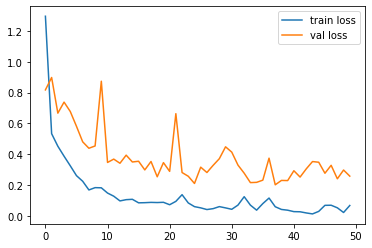

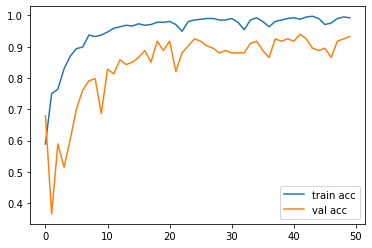

<Figure size 432x288 with 0 Axes>

In [77]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [78]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [79]:
y_pred = model.predict(test_set)

In [80]:
y_pred

array([[9.98390675e-01, 1.60933356e-03],
       [1.00000000e+00, 2.64441205e-18],
       [1.00000000e+00, 9.10476520e-29],
       [1.00000000e+00, 0.00000000e+00],
       [8.77406955e-01, 1.22593060e-01],
       [9.99922752e-01, 7.72586791e-05],
       [9.99999881e-01, 6.38941415e-08],
       [6.43003685e-03, 9.93569970e-01],
       [1.00000000e+00, 4.03448400e-15],
       [1.04804775e-02, 9.89519477e-01],
       [2.24383711e-03, 9.97756183e-01],
       [7.45563162e-03, 9.92544413e-01],
       [1.00000000e+00, 1.02663581e-11],
       [1.45816222e-01, 8.54183853e-01],
       [9.99984384e-01, 1.56350325e-05],
       [9.99998927e-01, 1.07915594e-06],
       [5.25236838e-02, 9.47476387e-01],
       [1.00000000e+00, 1.35330025e-10],
       [5.89461578e-03, 9.94105339e-01],
       [1.00000000e+00, 5.66198202e-19],
       [7.41947442e-02, 9.25805211e-01],
       [3.19460849e-03, 9.96805429e-01],
       [9.99620557e-01, 3.79378966e-04],
       [9.99999523e-01, 5.32075148e-07],
       [1.000000

In [81]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [82]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [83]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [84]:
model=load_model('model_vgg19.h5')

In [86]:
img=image.load_img('D:/Imarticus learning/Project/Image Classification/Malaria Detection/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [87]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [88]:
x.shape

(224, 224, 3)

In [89]:
x=x/255

In [90]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [91]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [92]:
a=np.argmax(model.predict(img_data), axis=1)

In [93]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
